# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Rizky Septa Surya Ramadhan]
- **Email:** [rizkysepta160908@gmail.com]
- **ID Dicoding:** [Zensud]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca (**weathersit**) terhadap jumlah penyewaan sepeda (**cnt**) pada hari kerja (**workingday**) dibandingkan dengan hari libur (**holiday**) selama tahun 2011 dan 2012?

- Apakah terdapat pola musiman (**seasonal pattern**) dalam jumlah penyewaan sepeda (**cnt**) yang dapat diidentifikasi dari data bulanan (**mnth**) selama tahun 2011 dan 2012, dan bagaimana pola tersebut berhubungan dengan suhu (**temp**) dan kelembaban (**hum**)?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [34]:
!wget -O Bike-Sharing-Dataset.zip "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"
!unzip Bike-Sharing-Dataset.zip
!rm Bike-Sharing-Dataset.zip

day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

--2025-02-11 16:37:42--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘Bike-Sharing-Dataset.zip’

Bike-Sharing-Datase     [ <=>                ] 273.43K  --.-KB/s    in 0.1s    

2025-02-11 16:37:42 (2.48 MB/s) - ‘Bike-Sharing-Dataset.zip’ saved [279992]

Archive:  Bike-Sharing-Dataset.zip
replace Readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


**Insight:**
- Mendownload datasets
- Read Datasets yang sudah di download

### Assessing Data

In [35]:
# Cek struktur data hour.csv dan day.csv
print("\nInformasi dataset hour.csv:")
print(hour_df.info())
print("\nInformasi dataset day.csv:")
print(day_df.info())

# Statistik deskriptif untuk hour.csv dan day.csv
print("\nDekripsi statistik hour.csv:")
print(hour_df.describe())
print("\nDekripsi statistikday.csv:")
print(day_df.describe())

# Cek nilai unik pada kolom 'weathersit' (kondisi cuaca)
print("\nNilai unik pada kolom weathersit (hour.csv):", hour_df['weathersit'].unique())
print("Nilai unik pada kolom weathersit (day.csv):", day_df['weathersit'].unique())

# Cek nilai unik pada kolom 'season' (musim)
print("\nNilai unik pada kolom season (hour.csv):", hour_df['season'].unique())
print("Nilai unik pada kolom season (day.csv):", day_df['season'].unique())


Informasi dataset hour.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

Informasi data

**Insight:**
- Cek Struktur, Value, Duplikat, Deskriptif untuk masing masing Dataset.
- Cek nilai unik pada kolom 'weathersit' pada masing masing Dataset.
- Cek nilai unik pada kolom 'season' pada masing masing Dataset.

### Cleaning Data

In [6]:
# Cek missing value pada hour.csv dan day.csv
print("\nMissing value pada hour.csv:")
print(hour_df.isnull().sum())
print("\nMissing value pada day.csv:")
print(day_df.isnull().sum())

# Cek duplikat pada hour.csv dan day.csv
print("\nJumlah duplikat pada hour.csv:", hour_df.duplicated().sum())
hour_df.drop_duplicates(inplace=True)
print("Jumlah duplikat pada day.csv:", day_df.duplicated().sum())
day_df.drop_duplicates(inplace=True)


Missing value pada hour.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing value pada day.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah duplikat pada hour.csv: 0
Jumlah duplikat pada day.csv: 0


**Insight:**
- Cek missing value di file hour.csv, dan day.csv
- Cek Duplikat dan Hapus duplikat di file hour.csv, dan day.csv

## Exploratory Data Analysis (EDA)

### Explore ...

In [7]:
# Cek struktur data hour.csv dan day.csv
print(hour_df.head())
print(hour_df.info())
print(hour_df.describe())

print(day_df.head())
print(day_df.info())
print(day_df.describe())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 

**Insight:**
- Melihat Struktur data untuk Visualization

## Visualization & Explanatory Analysis

### Pertanyaan 1:

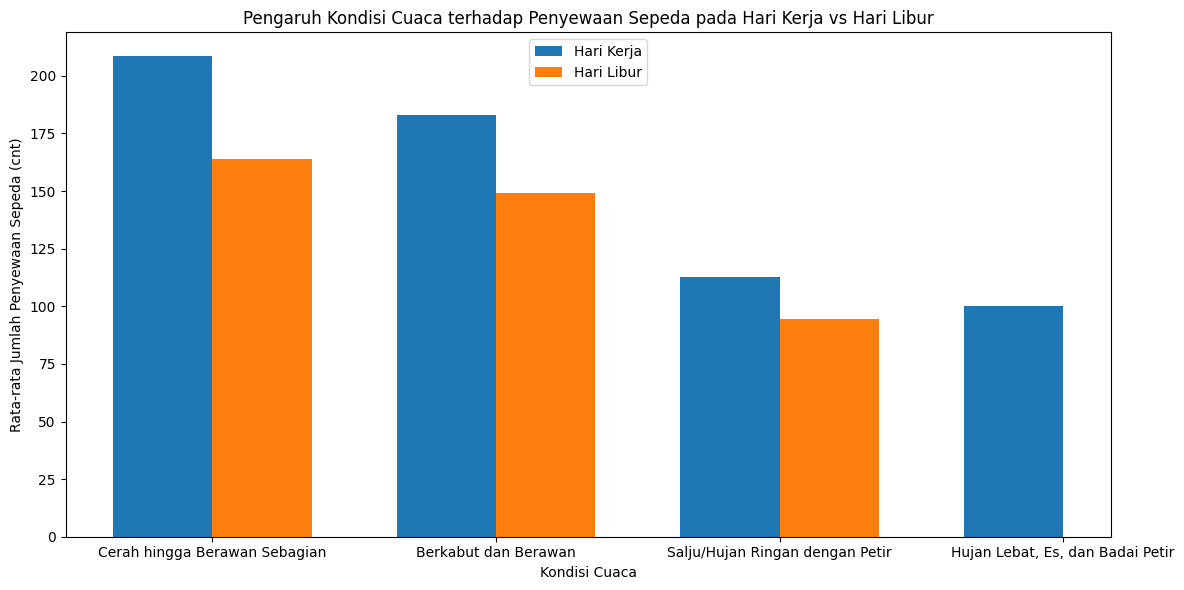

In [8]:
# Mapping untuk deskripsi kondisi cuaca
weather_mapping = {
    1: "Cerah hingga Berawan Sebagian",
    2: "Berkabut dan Berawan",
    3: "Salju/Hujan Ringan dengan Petir",
    4: "Hujan Lebat, Es, dan Badai Petir"
}

hour_df['weather_desc'] = hour_df['weathersit'].map(weather_mapping)

# Group data berdasarkan kondisi cuaca (weathersit), hari kerja (workingday), dan hari libur (holiday)
weather_rentals = hour_df.groupby(['weathersit', 'weather_desc', 'workingday', 'holiday'])['cnt'].mean().reset_index()

# Filter data untuk hari kerja (workingday = 1) dan hari libur (holiday = 1)
workingday_data = weather_rentals[(weather_rentals['workingday'] == 1) & (weather_rentals['holiday'] == 0)]
holiday_data = weather_rentals[(weather_rentals['holiday'] == 1) & (weather_rentals['workingday'] == 0)]

# Pastikan urutan kondisi cuaca sesuai dengan workingday_data
holiday_data = holiday_data.set_index('weathersit').reindex(workingday_data['weathersit']).reset_index()

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(workingday_data))

plt.bar(index, workingday_data['cnt'], bar_width, label='Hari Kerja')
plt.bar(index + bar_width, holiday_data['cnt'], bar_width, label='Hari Libur')

plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda (cnt)')
plt.title('Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda pada Hari Kerja vs Hari Libur')
plt.xticks(index + bar_width / 2, workingday_data['weather_desc'])
plt.legend()
plt.tight_layout()
plt.show()

### Pertanyaan 2:

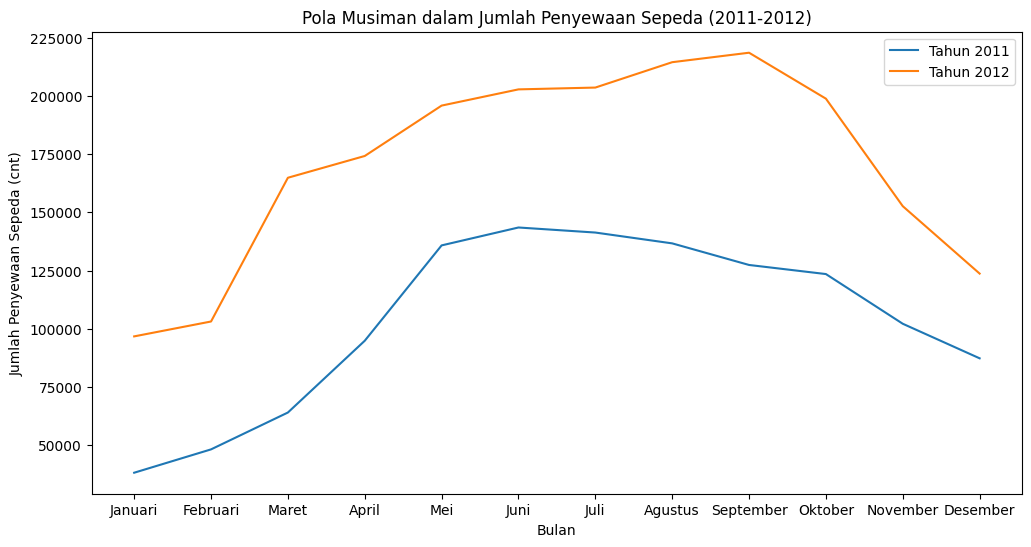

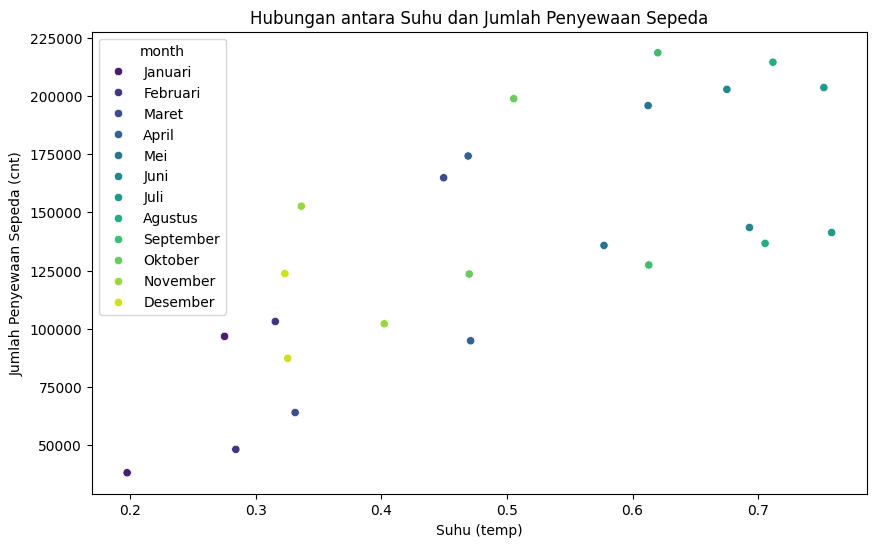

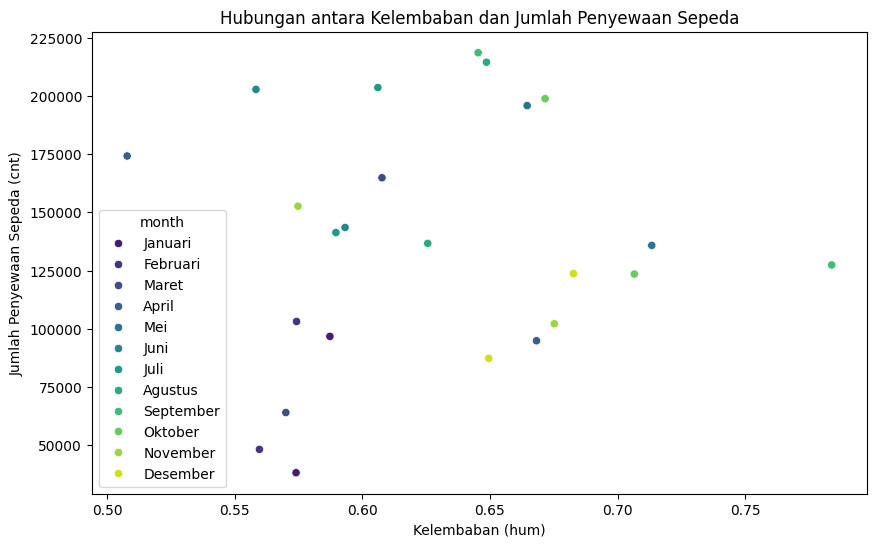

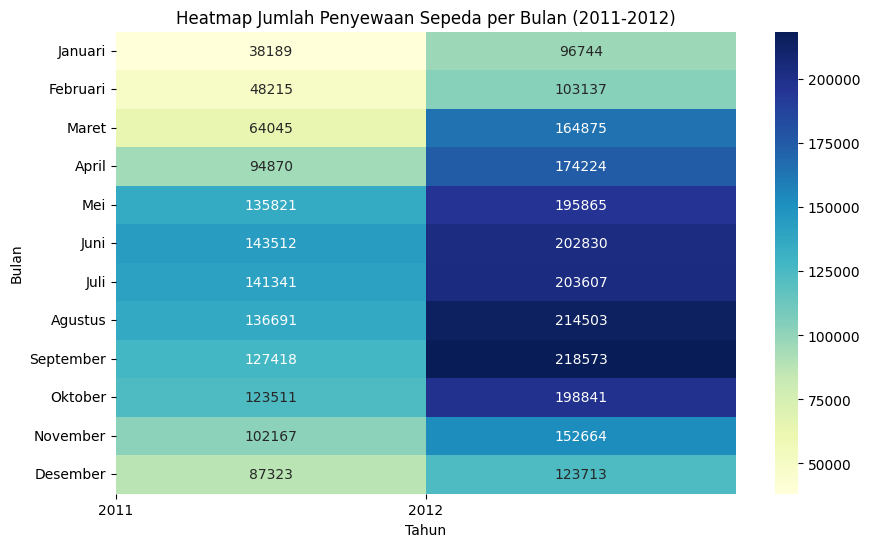

In [21]:
# Mapping untuk setiap nama bulan
month_mapping = {
    1: "Januari", 2: "Februari", 3: "Maret", 4: "April", 5: "Mei", 6: "Juni",
    7: "Juli", 8: "Agustus", 9: "September", 10: "Oktober", 11: "November", 12: "Desember"
}

month_order = list(month_mapping.values())

hour_df['month'] = pd.Categorical(hour_df['mnth'].map(month_mapping), categories=month_order, ordered=True)
day_df['month'] = pd.Categorical(day_df['mnth'].map(month_mapping), categories=month_order, ordered=True)

# Group data berdasarkan bulan dan tahun
monthly_rentals = hour_df.groupby(['yr', 'month'], observed=False)['cnt'].sum().reset_index()
monthly_weather = hour_df.groupby(['yr', 'month'], observed=False)[['temp', 'hum']].mean().reset_index()
monthly_data = pd.merge(monthly_rentals, monthly_weather, on=['yr', 'month'])

# Plot pola musiman
plt.figure(figsize=(12, 6))
for year in monthly_data['yr'].unique():
    year_data = monthly_data[monthly_data['yr'] == year]
    plt.plot(year_data['month'], year_data['cnt'], label=f'Tahun {2011 + year}')

plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan Sepeda (cnt)')
plt.title('Pola Musiman dalam Jumlah Penyewaan Sepeda (2011-2012)')
plt.legend()
plt.show()

# Scatter plot untuk hubungan antara suhu dan jumlah penyewaan
plt.figure(figsize=(10, 6))
sns.scatterplot(data=monthly_data, x='temp', y='cnt', hue='month', palette='viridis')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Penyewaan Sepeda (cnt)')
plt.title('Hubungan antara Suhu dan Jumlah Penyewaan Sepeda')
plt.show()

# Scatter plot untuk hubungan antara kelembaban dan jumlah penyewaan
plt.figure(figsize=(10, 6))
sns.scatterplot(data=monthly_data, x='hum', y='cnt', hue='month', palette='viridis')
plt.xlabel('Kelembaban (hum)')
plt.ylabel('Jumlah Penyewaan Sepeda (cnt)')
plt.title('Hubungan antara Kelembaban dan Jumlah Penyewaan Sepeda')
plt.show()

# Heatmap untuk hubungan antara bulan, suhu, dan jumlah penyewaan
heatmap_data = monthly_data.pivot(index='month', columns='yr', values='cnt')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='YlGnBu')
plt.xticks(ticks=[0, 1], labels=["2011", "2012"])
plt.xlabel('Tahun')
plt.ylabel('Bulan')
plt.title('Heatmap Jumlah Penyewaan Sepeda per Bulan (2011-2012)')
plt.show()

**Insight:**
- Pertanyaan 1
- Data dikelompokan berdasarkan cuaca, hari kerja, dan hari libur.
  - Membuat `weather_mapping` untuk deskripsi cuaca yang lebih mudah dipahami.
  -Data dikelompokkan berdasarkan kolom *weathersit*, `workingday`, dan `holiday` untuk menghitung `cnt`
  - Divisualisasikan dalam bentuk grafik batang.
- Pertanyaan 2
  - Membuat `month_mapping` untuk konversi angka menjadi nama-nama bulan.
  - Data dikelompokkan berdasarkan `yr` dan `mnth` untuk menghitung total penyewaan sepeda `cnt`.
  - Data suhu `temp` dan kelembaban `hum` di sum setiap bulan untuk melihat pengaruhnya terhadap jumlah penyewaan sepeda.
  - Divisualisasikan dalam bentuk Line Chart, Scatter Plot, dan Heatmap.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclusion pertanyaan 1
  - Penyewaan sepeda lebih tinggi pada kondisi cuaca cerah dibandingkan hujan atau badai.
  - penyewaan sepeda lebih tinggi pada hari kerja dibandingkan hari libur.
  - Saat cuaca buruk (hujan lebat, badai), jumlah penyewaan sepeda menurun drastis.

- Conclusion pertanyaan 2
  - Peningkatan penyewaan sepeda sepeda terlihat pada bulan-bulan musim panas (Juni, Juli, Agustus), sementara jumlah penyewaan menurun pada musim dingin (Desember, Januari, Februari).
  - Dari pola musiman, disimpulkan penyewaan sepeda meningkat ketika suhu lebih hangat (musim panas) dan menurun ketika suhu lebih dingin (musim dingin).
  - Pada kelembaban yang sangat tinggi atau rendah, jumlah penyewaan cenderung lebih sedikit, yang disebabkan oleh kenyamanan berkendara berkurang.
  - Pola musiman menunjukkan jumlah penyewaan tertinggi pada bulan Mei hingga September.